In [1]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph

import networkx as nx
import pylab as plt

In [2]:
G = MarkovNetwork()
G.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
G.add_edges_from([('x1', 'x2'), 
                  ('x1', 'x3'),
                  ('x2', 'x4'),
                  ('x3', 'x4'),
                  ('x4', 'x5'),
                  ('x4', 'x6'),
                  ('x5', 'x7'),
                  ('x6', 'x7')])
G.check_model()

True

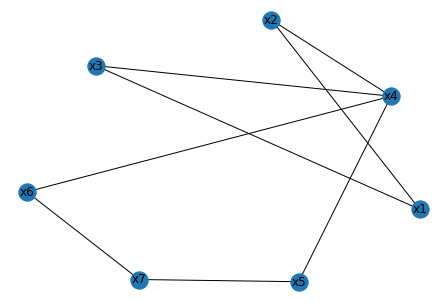

In [3]:
nx.draw(G, with_labels=True)
plt.show()

In [4]:
for node in ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']:
    l = []
    for r in G.markov_blanket(node):
        l.append(r)
    print('Blanket for', node, '===>', l)

Blanket for x1 ===> ['x2', 'x3']
Blanket for x2 ===> ['x1', 'x4']
Blanket for x3 ===> ['x1', 'x4']
Blanket for x4 ===> ['x2', 'x3', 'x5', 'x6']
Blanket for x5 ===> ['x4', 'x7']
Blanket for x6 ===> ['x4', 'x7']
Blanket for x7 ===> ['x5', 'x6']


/home/armando/ambientes_python/ambiente_general/lib/python3.8/site-packages/pgmpy/models/MarkovNetwork.py:448: RuntimeWarning: invalid value encountered in long_scalars
  S_by_C = {key: S[key] / C[key] for key in S}


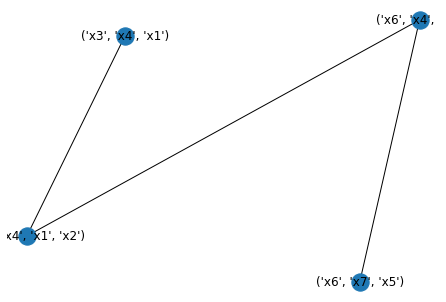

In [5]:
J = G.to_junction_tree()
#print(J.get_partition_function())
nx.draw(J, with_labels=True)
plt.show()

In [6]:
G.get_local_independencies()

(x1 ⟂ x7, x4, x5, x6 | x2, x3)
(x2 ⟂ x7, x5, x3, x6 | x4, x1)
(x3 ⟂ x7, x5, x2, x6 | x4, x1)
(x4 ⟂ x7, x1 | x5, x2, x3, x6)
(x5 ⟂ x1, x2, x3, x6 | x7, x4)
(x6 ⟂ x1, x2, x3, x5 | x7, x4)
(x7 ⟂ x4, x1, x2, x3 | x5, x6)

# Factor model

In [7]:
F = FactorGraph()

F.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
#F.add_edges_from([('x1', 'x2')])

"""
F.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
F.add_edges_from([('x1', 'x2'), 
                  ('x1', 'x3'),
                  ('x2', 'x4'),
                  ('x3', 'x4'),
                  ('x4', 'x5'),
                  ('x4', 'x6'),
                  ('x5', 'x7'),
                  ('x6', 'x7')])
"""

phi12 = DiscreteFactor(['x1', 'x2'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi13 = DiscreteFactor(['x1', 'x3'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi24 = DiscreteFactor(['x2', 'x4'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi34 = DiscreteFactor(['x3', 'x4'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi45 = DiscreteFactor(['x4', 'x5'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi46 = DiscreteFactor(['x4', 'x6'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi57 = DiscreteFactor(['x5', 'x7'], cardinality=[2, 2], values=[1, 1, 1, 1])
phi67 = DiscreteFactor(['x6', 'x7'], cardinality=[2, 2], values=[1, 1, 1, 1])

F.add_factors(phi12)
F.add_factors(phi13)
F.add_factors(phi24)
F.add_factors(phi34)
F.add_factors(phi45)
F.add_factors(phi46)
F.add_factors(phi57)
F.add_factors(phi67)

F.add_edges_from([('x1', phi12), ('x2', phi12),
                  ('x1', phi13), ('x3', phi13),
                  ('x2', phi24), ('x4', phi24),
                  ('x3', phi34), ('x4', phi34),
                  ('x4', phi45), ('x5', phi45),
                  ('x4', phi46), ('x6', phi46),
                  ('x5', phi57), ('x7', phi57),
                  ('x6', phi67), ('x7', phi67)
                 ])

F.check_model()

True

128.0


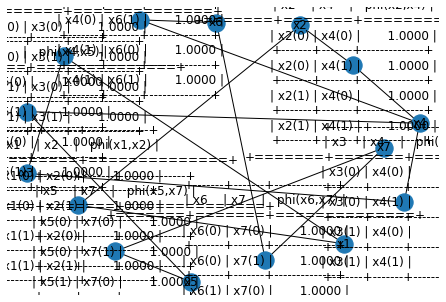

In [8]:
print(F.get_partition_function())
#print(F.get_factors())
#print(F.to_junction_tree())
nx.draw(F, with_labels=True)
plt.show()